In [ ]:
import os
import agml
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
from sklearn.metrics import classification_report, confusion_matrix
from torchvision import transforms
from PIL import Image
from torch.utils.data import Dataset
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
# Load the Rangeland Weeds Australia dataset
loader = agml.data.AgMLDataLoader('rangeland_weeds_australia', dataset_path = '/work/mech-ai/mozhgan/HW4-new')

In [ ]:
loader.info.summary()

==================== DATASET SUMMARY ====================
Name: rangeland_weeds_australia
Machine Learning Task: image_classification
Agricultural Task: weed_classification
Location:
  continent: oceania
  country: australia
Sensor Modality: rgb
Real Or Synthetic: real
Platform: ground
Input Data Format: jpg
Annotation Format: directory_names
Number of Images: 17509
Documentation: https://github.com/AlexOlsen/DeepWeeds
Stats:
  mean:
  - 0.3785816431045532
  - 0.38957422971725464
  - 0.3797682821750641
  std:
  - 0.22421954572200775
  - 0.22450360655784607
  - 0.22274591028690338
Classes:
  '0': no_weeds
  '1': chinee_apple
  '2': lantana
  '3': parkinsonia
  '4': parthenium
  '5': prickly_acacia
  '6': rubber_vine
  '7': siam_weed
  '8': snake_weed
  '9': negative
External Image Sources: []


In [ ]:
classes = loader.classes
classes

['no_weeds',
 'chinee_apple',
 'lantana',
 'parkinsonia',
 'parthenium',
 'prickly_acacia',
 'rubber_vine',
 'siam_weed',
 'snake_weed',
 'negative']

In [ ]:
len(loader)

17509

In [ ]:
transforms1=transforms.Compose([
#   resizing the dataset(images)
   transforms.Resize((256, 256)),
   transforms.ToTensor(),  #0-255 to 0-1, numpy to tensors
])

In [ ]:
for i in range(len(loader)):
        #for i in range(5):
        inputs, targets = loader[i]

In [ ]:
inputs.shape

(256, 256, 3)

In [ ]:
inputs = Image.fromarray(inputs)
inputs = transforms1(inputs)

In [ ]:
#we do't have batch size as we are not training the model so we need to reshape the inputs 
# Actually 1 is instead of batch size!
inputs = torch.reshape(inputs, (1, 3, 256, 256))

In [ ]:
inputs.shape

torch.Size([1, 3, 256, 256])

In [ ]:
len(classes)

10

In [ ]:
# Load the pretrained ConvNeXt-tiny model
model = models.convnext_tiny(pretrained='imagenet')
# Add a new fully connected layer for the number of classes in the dataset
num_classes = len(classes)
model.fc = nn.Linear(1000, num_classes) # The output of ConvNeXt-tiny is a 1000-dimensional feature vector

# Set the device to use
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Set the model to evaluation mode
model.eval()

# Evaluate the model on the test set
with torch.no_grad():
    test_loss = 0.0
    correct = 0
    total = 0
    y_true = []
    y_pred = []
    for i in range(len(loader)):
        #for i in range(5):
        inputs, targets = loader[i]
        inputs = Image.fromarray(inputs)
        inputs = transforms1(inputs)
        targets = torch.tensor(targets)
        inputs = torch.reshape(inputs,(1, 3, 256, 256))
        inputs, targets = inputs.to(device), targets.to(device)
        try :
            outputs = model(inputs)
            outputs = model.fc(outputs)    # Using the last added layer
            print(i)
        except: 
            print('Problem occured')
            break
        _, predicted = outputs.max(1)
        total += 1
        correct += predicted.eq(targets).sum().item()
        # print(y_true)
        # print(y_pred)
        y_true.append(targets.cpu().numpy())
        y_pred.append(predicted.cpu().numpy())

print('Test Loss: {:.4f}'.format(test_loss))
print('Test Accuracy: {:.2f}%'.format(100.0 * correct / total))
print('Confusion Matrix:')
print(confusion_matrix(y_true, y_pred))


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
print('Test Loss: {:.4f}'.format(test_loss))
print('Test Accuracy: {:.2f}%'.format(100.0 * correct / total))
print('Confusion Matrix:')
print(confusion_matrix(y_true, y_pred))

Test Loss: 0.0000
Test Accuracy: 8.31%
Confusion Matrix:
[[   0    0    0    0    0    0    0    0    0    0]
 [  35  582   89    0   32    1   58  311    1   16]
 [  66  293  101    0   38    0  131  403   23    9]
 [   2  217    7    0    0    0   37  745   18    5]
 [  23  410   32    0    3    8  122  409    2   13]
 [   1  619    2    0    1    1   29  390   13    6]
 [  31  463   23    0   25    0  222  240    1    4]
 [  14  229    8    0    7    0  324  444   42    6]
 [  30  441   73    0   14    0   55  395    1    7]
 [ 343 3623  339    0   34   19 1289 2649  709  101]]


In [ ]:
print('Classification Report:')
print(classification_report(y_true, y_pred, target_names=classes))

Classification Report:
                precision    recall  f1-score   support

      no_weeds       0.00      0.00      0.00         0
  chinee_apple       0.08      0.52      0.15      1125
       lantana       0.15      0.09      0.12      1064
   parkinsonia       0.00      0.00      0.00      1031
    parthenium       0.02      0.00      0.01      1022
prickly_acacia       0.03      0.00      0.00      1062
   rubber_vine       0.10      0.22      0.14      1009
     siam_weed       0.07      0.41      0.13      1074
    snake_weed       0.00      0.00      0.00      1016
      negative       0.60      0.01      0.02      9106

      accuracy                           0.08     17509
     macro avg       0.11      0.13      0.06     17509
  weighted avg       0.34      0.08      0.04     17509



/work/mech-ai/mozhgan/Anaconda/envs/arbdp/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/work/mech-ai/mozhgan/Anaconda/envs/arbdp/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/work/mech-ai/mozhgan/Anaconda/envs/arbdp/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_st

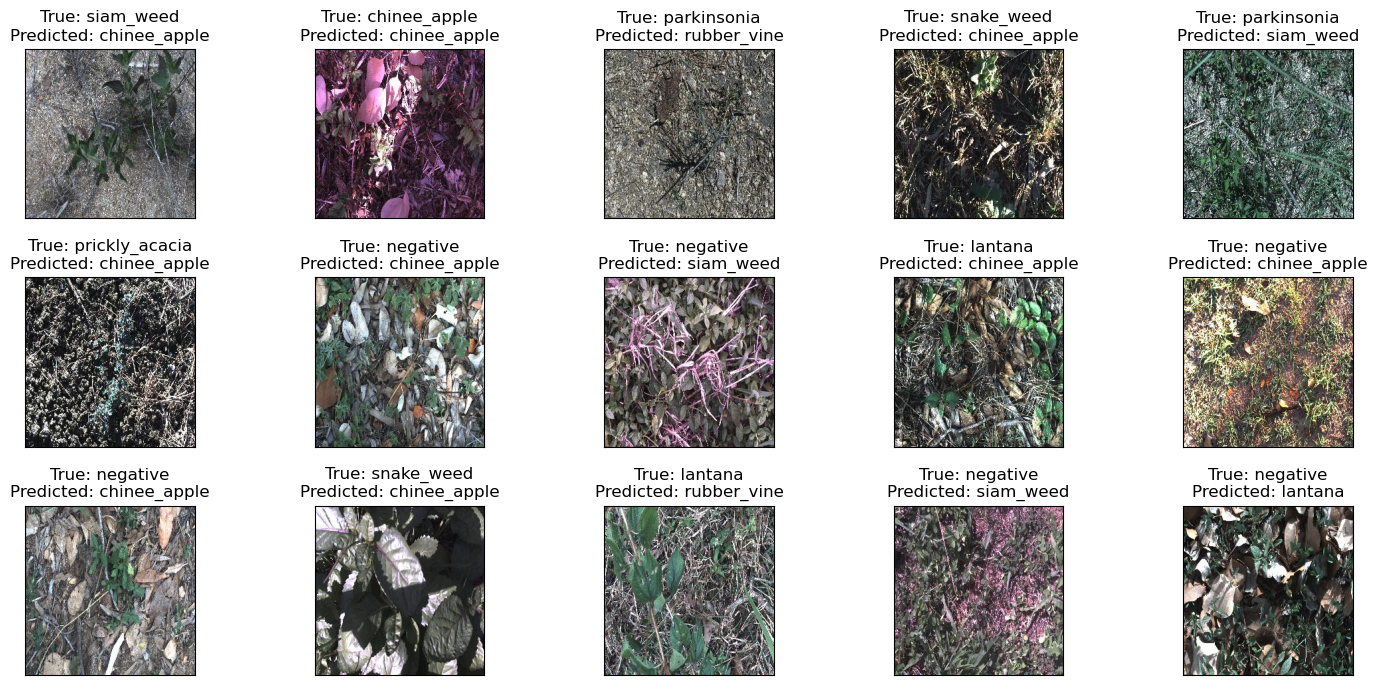

In [ ]:
# Display 15 random pictures of the dataset with their labels
inds = np.random.randint(len(loader), size=15)
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 7),
                        subplot_kw={'xticks': [], 'yticks': []})
for i, ax in zip(inds, axes.flat):
    img, label = loader[int(i)]  # Convert numpy.int64 to int
    true_label = classes[label]
    predicted_label = loader.classes[int(y_pred[i])]  # Assuming y_pred contains predicted labels
    ax.imshow(img)
    ax.set_title(f"True: {true_label}\nPredicted: {predicted_label}")
plt.tight_layout()
plt.show()

**Part 3:**

In order to improve the performance on the weeds dataset, we can fine-tune the pre-trained model. This means the pre-trained model is trained using the weeds dataset, but the pre-trained weights of most layers are kept frozen, especially the earlier layers, since they capture the lower-level features, and the task-specific weights of the last few layers are updated to adapt to the test dataset. However, we should be careful not to modify the pre-trained weights too much, which results in overfitting. To further improve the performance, regularization techniques such as data augmentation and dropout can be employed.
